<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_credito6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base Credito com algoritmo MLPClassifier (multilayer perceptron)

In [1]:
!pip -q install plotly

In [2]:
!pip -q  install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
basecredito = pd.read_csv('/content/credit_data.csv')

In [6]:
basecredito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
basecredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [8]:
basecredito[basecredito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [9]:
basecredito[basecredito['age']>0].mean()

,0
clientid,1003.431795
income,45328.856915
age,40.927700
loan,4443.240892
default,0.141926


In [10]:
basecredito.loc[basecredito['age']<0, 'age'] = 40.92

In [11]:
basecredito[basecredito['age']<0]

,clientid,income,age,loan,default


In [12]:
basecredito.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [13]:
basecredito.loc[pd.isnull(basecredito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [14]:
basecredito['age']= basecredito['age'].fillna(basecredito['age'].mean())

In [15]:
xcredito = basecredito.iloc[:,1:4].values
xcredito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [16]:
ycredito = basecredito.iloc[:,4].values
ycredito

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
xcredito = standardscaler.fit_transform(xcredito)
xcredito

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [18]:
from sklearn.model_selection import train_test_split
xtreino, xtest, ytreino, ytest = train_test_split(xcredito, ycredito, test_size = 0.15, random_state =0)

In [19]:
xtest.shape

(300, 3)

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
redeneural_credit = MLPClassifier(max_iter =1500, verbose=True, tol=0.0000100, solver ='adam', activation='relu',hidden_layer_sizes=(2,2))
redeneural_credit.fit(xtreino, ytreino)

Iteration 1, loss = 1.09298967
Iteration 2, loss = 1.08085675
Iteration 3, loss = 1.06843142
Iteration 4, loss = 1.05580927
Iteration 5, loss = 1.04298188
Iteration 6, loss = 1.02987713
Iteration 7, loss = 1.01656363
Iteration 8, loss = 1.00295320
Iteration 9, loss = 0.98902972
Iteration 10, loss = 0.97516892
Iteration 11, loss = 0.96113713
Iteration 12, loss = 0.94695349
Iteration 13, loss = 0.93246471
Iteration 14, loss = 0.91795528
Iteration 15, loss = 0.90336035
Iteration 16, loss = 0.88865168
Iteration 17, loss = 0.87396770
Iteration 18, loss = 0.85921273
Iteration 19, loss = 0.84474676
Iteration 20, loss = 0.83018591
Iteration 21, loss = 0.81560724
Iteration 22, loss = 0.80126241
Iteration 23, loss = 0.78716465
Iteration 24, loss = 0.77307005
Iteration 25, loss = 0.75925874
Iteration 26, loss = 0.74553644
Iteration 27, loss = 0.73211415
Iteration 28, loss = 0.71877751
Iteration 29, loss = 0.70518026
Iteration 30, loss = 0.69215405
Iteration 31, loss = 0.67941829
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [22]:
previsoes = redeneural_credit.predict(xtest)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(ytest, previsoes)

0.9966666666666667

0.9966666666666667

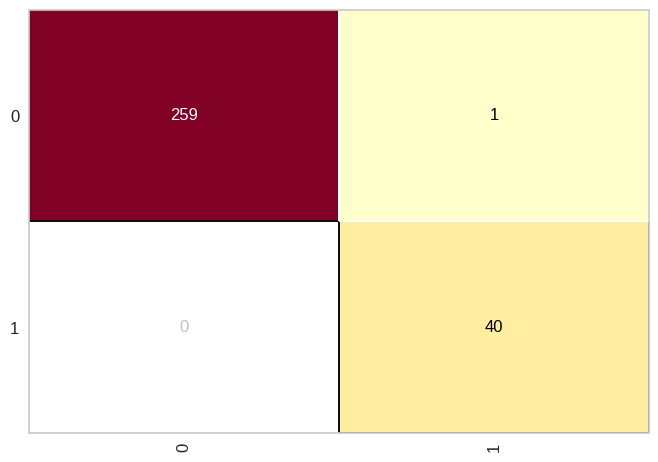

In [26]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(redeneural_credit)
cm.fit(xtreino,ytreino)
cm.score(xtest,ytest)


In [28]:
print(classification_report(previsoes,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      0.98      0.99        41

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300

